Breast Cancer Predictive Analytics for Resourse Allocation
This project helps hospitals priotize patients based on cancer diagnosis predictions.

In [3]:
# Import libraries
import pandas as pd  #pandas: for data manipulation and analysis
import numpy as np  # numpy: for numerical operations
import matplotlib.pyplot as plt # matplotlib: for creating visualizations and plots
import seaborn as sns # seaborn: for statistical data visualization (built on matplotlib)
# Scikit-learn modules for machine learning
from sklearn.model_selection import train_test_split # train_test_split: to split data into training and testing sets
from sklearn.preprocessing import StandardScaler, LabelEncoder # StandardScaler: to standardize features by removing mean and scaling to unit variance
from sklearn.ensemble import RandomForestClassifier # RandomForestClassifier: our main machine learning model
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix # Metrics to evaluate our model performance
from sklearn.model_selection import cross_val_score, GridSearchCV # Cross-validation to test model robustness
import warnings # Suppress warning messages to keep output clean
warnings.filterwarnings("ignore")
print("Breast Cancer Predictive Analytics for Resource Allocation \n")  # Test to see they work

Breast Cancer Predictive Analytics for Resource Allocation 



In [4]:
# Part 1: Data Loading and Initial Exploration
# This step helps us understand what data we're working with.

print("Data loading and exploration")
print("="*30)   # creates a visual separator line

# Load the dataset from CSV file into a pandas DataFrame
# DataFrame is like a spreadsheet table in python
df = pd.read_csv('breast_cancer_data.csv')

#print basic info about our dataset
print(f"Dataset Shape: {df.shape}")  #shows number of rows and columns
print(f"Columns: {df.columns.tolist()}")  # shows all column names as a list
print(f"\nFirst 5 rows of the dataset:\n{df.head()}")  # creates a new line and displays first 5 rows of the dataset

print(f"\nDataset Info:\n{df.info()}")  # Gets more detailed info about the dataset and shows data types and memory usage
print(f"\nBasic Statistics:\n{df.describe()}")  # Shows count, mean, std, min, max for numerical columns

Data loading and exploration
Dataset Shape: (569, 32)
Columns: ['Id', 'Diagnosis', 'Radius (mean)', 'Texture (mean)', 'Perimeter (mean)', 'Area (mean)', 'Smoothness (mean)', 'Compactness (mean)', 'Concavity (mean)', 'Concave points (mean)', 'Symmetry (mean)', 'Fractal dimension (mean)', 'Radius (se)', 'Texture (se)', 'Perimeter (se)', 'Area (se)', 'Smoothness (se)', 'Compactness (se)', 'Concavity (se)', 'Concave points (se)', 'Symmetry (se)', 'Fractal dimension (se)', 'Radius (worst)', 'Texture (worst)', 'Perimeter (worst)', 'Area (worst)', 'Smoothness (worst)', 'Compactness (worst)', 'Concavity (worst)', 'Concave points (worst)', 'Symmetry (worst)', 'Fractal dimension (worst)']

First 5 rows of the dataset:
         Id Diagnosis  Radius (mean)  Texture (mean)  Perimeter (mean)  \
0   8510426         B         13.540           14.36             87.46   
1   8510653         B         13.080           15.71             85.63   
2   8510824         B          9.504           12.44        

In [5]:
#2: Data preprocessing and cleaning
# Prepare our data for machine leanring by handling missing values and encoding categorical variables
print("\nSTEP 2: Data Preprocessing and Cleaning")
print("="*40)

# Check for missing values in each column
# Missing data can cause problems in machine learning
print("Missing values in each column:")
print(df.isnull().sum()) # Counts numm/empty values in each column

#Check the distribution of the target variable(what we want to predict)
print("\nTarget variable distribution:")
print(df["Diagnosis"].value_counts())  # Count how many Benign (B) vs Malignant (M)

# Convert text diagnosis to numbers so computer understanding
# LabelEncoder converts text categories to numbers(B=0, M=1)
le = LabelEncoder() #Create a LabelEncoder object
df["diagnosis_encoded"] = le.fit_transform(df["Diagnosis"]) #Transform and store result

#show how the encoding worked
print(f"\nDiagnosis encoding: {list(zip(le.classes_, le.transform(le.classes_)))}")

# Create a more detailed priority system for resource allocation
#Calculate a risk score using two important features
df["risk_score"] = (df["Concavity (worst)"] + df["Concave points (worst)"]) / 2

#Set thresholds for priority levels using percentiles
#Percentiles hep us split data into equal groups
low_threshold = df["risk_score"].quantile(0.33)     #33rd percentile
medium_threshold = df["risk_score"].quantile(0.66)  #66th percentile

#Define a function to assign priority levels based on diagnosis and risk
def assign_priority(row):
    #If diagnosis is Benign, always low priority
    if row["Diagnosis"] == "B":
        return 0    #Low priority
    # If diagnosis is Malignant, check risk score
    elif row["Diagnosis"] == "M":
        if row["risk_score"] < low_threshold:
            return 1    #Medium priority
        elif row["risk_score"] < medium_threshold:
            return 2    #High priority
        else:
            return 3    #Critical priority
        
# Apply the function to each row in the dataframe
df['priority'] = df.apply(assign_priority, axis=1)

# Show how many cases fall into each priority level
print(df["priority"].value_counts().sort_index())   #Count by priority level
print("0: Low Priority (Benign)")
print("1: Medium Priority (Malignant - Lower Risk)")
print("2: High Priority (Malignant - Higher Risk)")

# Prepare features (X) and target (y) for machine learning
# Features: all columns except ID, Diagnosis, and our temporary columns
columns_to_drop = ['Id', 'Diagnosis', 'diagnosis_encoded', 'risk_score']
X = df.drop(columns=columns_to_drop + ['priority'])  # Features (input variables)
y = df['priority']  # Target (what we want to predict)

print(f"\nFeatures shape: {X.shape}")  # Number of features and samples
print(f"Target shape: {y.shape}")     # Number of target values


STEP 2: Data Preprocessing and Cleaning
Missing values in each column:
Id                           0
Diagnosis                    0
Radius (mean)                0
Texture (mean)               0
Perimeter (mean)             0
Area (mean)                  0
Smoothness (mean)            0
Compactness (mean)           0
Concavity (mean)             0
Concave points (mean)        0
Symmetry (mean)              0
Fractal dimension (mean)     0
Radius (se)                  0
Texture (se)                 0
Perimeter (se)               0
Area (se)                    0
Smoothness (se)              0
Compactness (se)             0
Concavity (se)               0
Concave points (se)          0
Symmetry (se)                0
Fractal dimension (se)       0
Radius (worst)               0
Texture (worst)              0
Perimeter (worst)            0
Area (worst)                 0
Smoothness (worst)           0
Compactness (worst)          0
Concavity (worst)            0
Concave points (worst)       


STEP 3: DATA VISUALIZATION


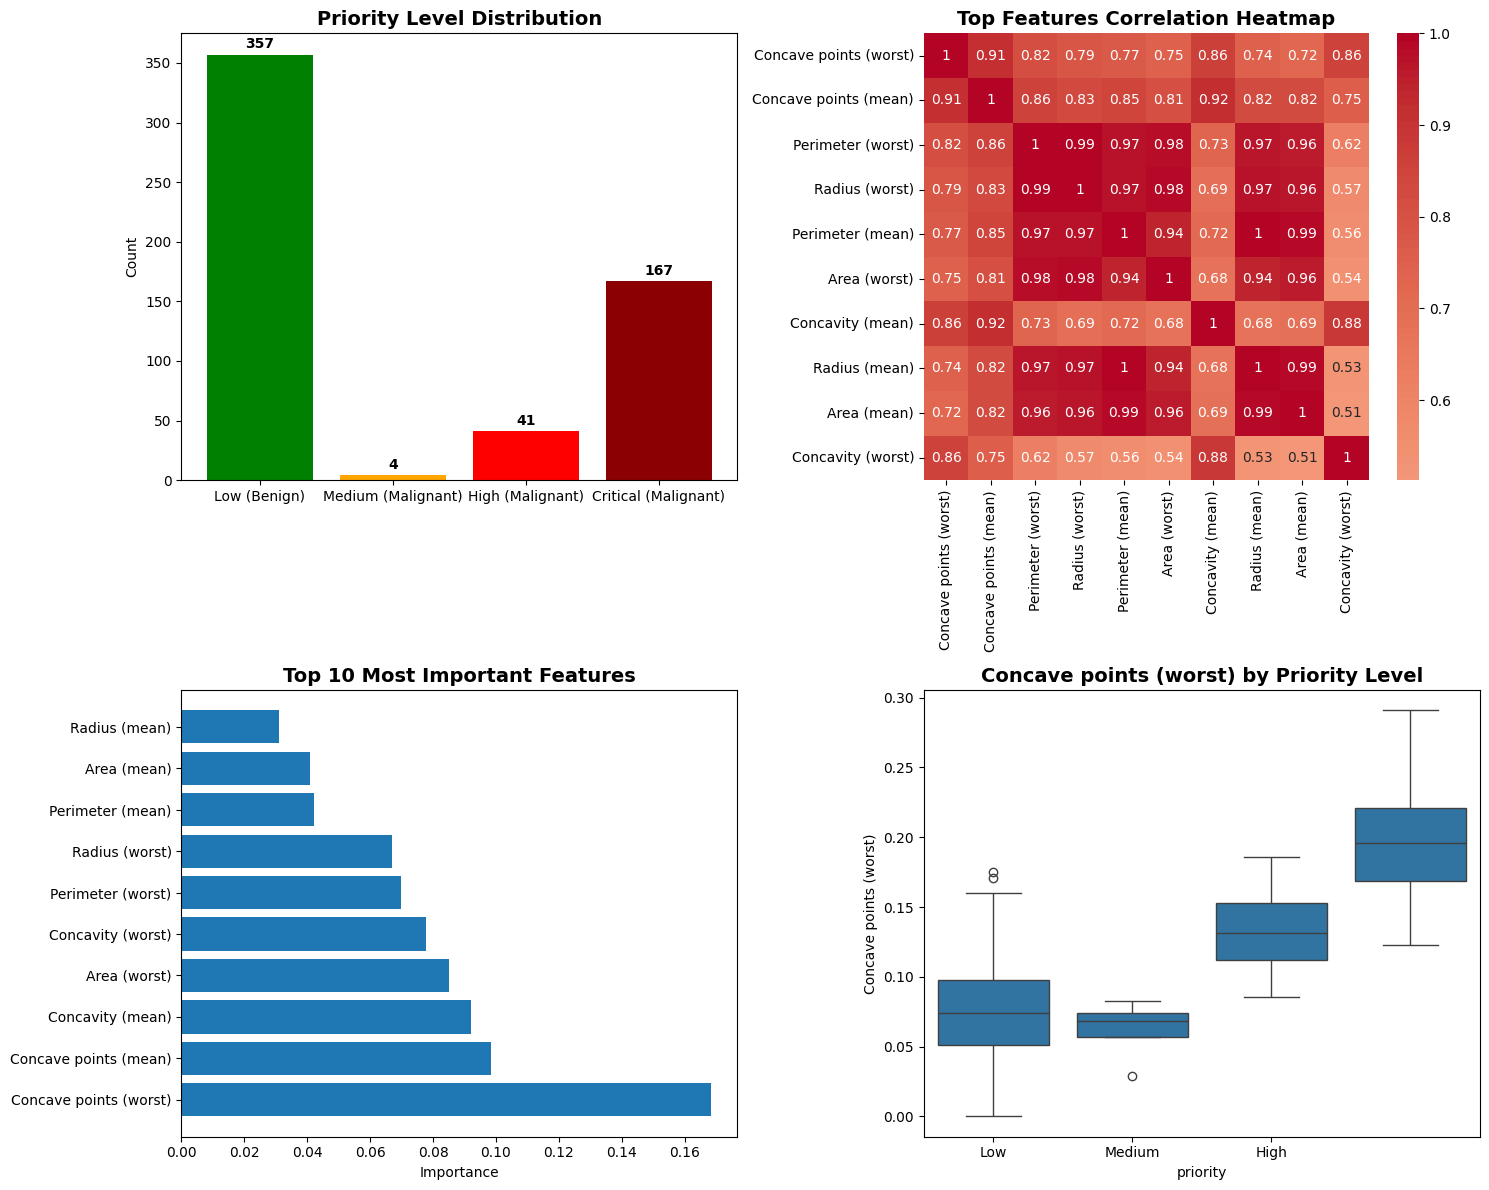

Visualizations completed. Key insights:
- Class distribution shows natural imbalance (more benign cases)
- Worst features (concavity, concave points, perimeter) are most predictive
- Clear separation between priority levels in key features


In [6]:
#3: Data visualization
# Create charts to understand our data better

print("\nSTEP 3: DATA VISUALIZATION")
print("="*27)

# Set up the plotting style to make charts look nice
plt.style.use('default')

# Create a 2x2 grid of subplots (4 charts total)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Bar chart showing priority distribution
priority_labels = ['Low (Benign)', 'Medium (Malignant)', 'High (Malignant)', 'Critical (Malignant)']
priority_counts = df['priority'].value_counts().sort_index()  # Count each priority level

# Create bar chart
axes[0, 0].bar(priority_labels, priority_counts, color=['green', 'orange', 'red', 'darkred'])
axes[0, 0].set_title('Priority Level Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Count')


# Add value labels on top of each bar
for i, v in enumerate(priority_counts):
    axes[0,0].text(i, v + 3, str(v), ha='center', va='bottom', fontweight='bold')

# Plot 2: Correlation heatmap - shows how features relate to each other
# Calculate correlation between each feature and our target (priority)
correlations = X.corrwith(y).abs().sort_values(ascending=False)
# Select top 10 most correlated features
top_features = correlations.head(10).index
# Calculate correlation matrix for these top features
corr_matrix = X[top_features].corr()

# Create heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[0,1])
axes[0,1].set_title('Top Features Correlation Heatmap', fontsize=14, fontweight='bold')

# Plot 3: Feature importance using Random Forest
# Train a quick model to see which features are most important
rf_preview = RandomForestClassifier(n_estimators=100, random_state=42)
rf_preview.fit(X, y)  # Train the model

# Get feature importance scores
feature_importance = pd.DataFrame({
    'feature': X.columns,  # Feature names
    'importance': rf_preview.feature_importances_  # Importance scores
}).sort_values('importance', ascending=False).head(10)  # Top 10 features

# Create horizontal bar chart
axes[1,0].barh(feature_importance['feature'], feature_importance['importance'])
axes[1,0].set_title('Top 10 Most Important Features', fontsize=14, fontweight='bold')
axes[1,0].set_xlabel('Importance')

# Plot 4: Box plot showing feature distribution by priority
feature_example = 'Concave points (worst)'  # Choose one important feature
# Create box plot to show distribution differences
sns.boxplot(data=df, x='priority', y=feature_example, ax=axes[1,1])
axes[1,1].set_title(f'{feature_example} by Priority Level', fontsize=14, fontweight='bold')
axes[1,1].set_xticks([0, 1, 2])  # Set x-axis ticks
axes[1,1].set_xticklabels(['Low', 'Medium', 'High'])  # Set x-axis labels

# Adjust layout and display all plots
plt.tight_layout()
plt.show()

# Explain what we learned from the visualizations
print("Visualizations completed. Key insights:")
print("- Class distribution shows natural imbalance (more benign cases)")
print("- Worst features (concavity, concave points, perimeter) are most predictive")
print("- Clear separation between priority levels in key features")

In [7]:
# 4: Data splitting and feature scaling
# Split data into training and testing sets, scale features
print("\nSTEP 4: Data splitting and feature scaling")
print("="*43)

#Split the data into training set (80%) and testing set (20%)
#random_state=42 ensures we get same split every time(for reproducibility)
#stratify=y ensures same proportion of priority levels in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#Print info about out data splits
print(f"Training set size: {X_train.shape[0]}") #Number of training samples
print(f"Test set size: {X_test.shape[0]}")      # Number of test samples
print(f"Training set priority distribution:\n{y_train.value_counts().sort_index()}")
print(f"Test set priority distribution:\n{y_test.value_counts().sort_index()}")
# Scale the features so they have similar ranges
# Important for many machine learning algorithms
scaler = StandardScaler()  # Creates a scaler object
X_train_scaled = scaler.fit_transform(X_train)  # Fit to training data and transform
X_test_scaled = scaler.transform(X_test)       # Transform test data using same scaling

print("\nFeature scaling completed using StandardScaler")
print(f"Scaled training data shape: {X_train_scaled.shape}")
print(f"Scaled test data shape: {X_test_scaled.shape}")



STEP 4: Data splitting and feature scaling
Training set size: 455
Test set size: 114
Training set priority distribution:
priority
0    285
1      3
2     33
3    134
Name: count, dtype: int64
Test set priority distribution:
priority
0    72
1     1
2     8
3    33
Name: count, dtype: int64

Feature scaling completed using StandardScaler
Scaled training data shape: (455, 30)
Scaled test data shape: (114, 30)


In [8]:
# 5: Model training - Random forest classfier
# Training our machine learning model to predict priority levels

print("\nSTEP 5: Model Training - Random Forest Classifier")
print("="*50)

# Initialize the random forest model with specific parameters
#Random forest creates multiple decision trees and combines their predictions
rf_model = RandomForestClassifier(
    n_estimators=100,   # Number of trees in the forest
    max_depth=10,   #Max depth of each tree
    min_samples_split=5,    #Min samples required to split a node
    min_samples_leaf=2,  #Min samples required at a leaf node
    random_state=42,    #For reproducible results
    class_weight="balanced" #Handle class imbalance (more low priority cases)
)

print("Training Random Forest model...")
# Traon the model using our training data
rf_model.fit(X_train_scaled, y_train)

print("Model training completed!")
print(f"Number of trees: {len(rf_model.estimators_)}")  #How many trees were created
print(f"Number of features: {rf_model.n_features_in_}") #How many features used



STEP 5: Model Training - Random Forest Classifier
Training Random Forest model...
Model training completed!
Number of trees: 100
Number of features: 30


In [9]:
# 6: Model Evaluation
# Test how well our model performs on unseen data
print("\nSTEP 6: Model Evaluation")
print("="*25)

#Use trained model to make predictions on test data
y_pred = rf_model.predict(X_test_scaled)    #Predict priority levels
y_pred_proba = rf_model.predict_proba(X_test_scaled)    #Get probability scores

#Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)   #Percenatege of correct predictions
f1 = f1_score(y_test, y_pred, average="weighted")   #F1-score (weighted average)
f1_macro = f1_score(y_test, y_pred, average="macro")    #Fi-score (macro average)

print("Performance Metrics")
print("-" * 25)
print(f"Accuracy: {accuracy:.4f}")  # Format to 4 decimal places
print(f"F1-Score (Weighted): {f1:.4f}")
print(f"F1-Score (Macro): {f1_macro:.4f}")

# Detailed classification report showing precision, recall, f1-score for each class
print("\nDetailed Classification Report")
print("-" *25)
print(classification_report(y_test, y_pred, target_names=['Low', 'Medium', 'High', 'Critical']))


# Confusion Matrix - shows correct and incorrect predictions
print("Confusion Matrix")
print("-" * 20)
cm = confusion_matrix(y_test, y_pred)  # Create confusion matrix
# Convert to DataFrame for better display
cm_df = pd.DataFrame(
    cm,
    index=['Actual Low', 'Actual Medium', 'Actual High', 'Actual Critical'],
    columns=['Predicted Low', 'Predicted Medium', 'Predicted High', 'Predicted Critical']
)
print(cm_df)




STEP 6: Model Evaluation
Performance Metrics
-------------------------
Accuracy: 0.9649
F1-Score (Weighted): 0.9598
F1-Score (Macro): 0.6890

Detailed Classification Report
-------------------------
              precision    recall  f1-score   support

         Low       0.97      1.00      0.99        72
      Medium       0.00      0.00      0.00         1
        High       0.86      0.75      0.80         8
    Critical       0.97      0.97      0.97        33

    accuracy                           0.96       114
   macro avg       0.70      0.68      0.69       114
weighted avg       0.96      0.96      0.96       114

Confusion Matrix
--------------------
                 Predicted Low  Predicted Medium  Predicted High  \
Actual Low                  72                 0               0   
Actual Medium                1                 0               0   
Actual High                  1                 0               6   
Actual Critical              0                 0       

In [10]:
# 7: Cross-validation and model robustness
# Test if our model performs consistently on different data splits

print("\n STEP 7: Cross-validation and model robustness")
print("="* 45)

# Performs 5-fold cross-validation
# This splits training data into 5 parts, trains on 4, tests on 1, repeats 5 times
cv_scores_accuracy = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring="accuracy")
cv_scores_f1 = cross_val_score(rf_model, X_train_scaled, y_train, cv=5, scoring="f1_weighted")

print("Cross-validation results(5-fold)")
print("-" * 33)
#print mean and standard deviation of cross-validation scores
print(f"accuracy - Mean: {cv_scores_accuracy.mean()} (+/- {cv_scores_accuracy.std() * 2:.4f})")
print(f"F1-Score - Mean: {cv_scores_f1.mean():.4f} (+/- {cv_scores_f1.std() * 2:.4f})")
# Show individual fold scores
print(f"Individual CV Accuracy scores: {[f'{score:.4f}' for score in cv_scores_accuracy]}")
print(f"Individual CV F1 scores: {[f'{score:.4f}' for score in cv_scores_f1]}")




 STEP 7: Cross-validation and model robustness
Cross-validation results(5-fold)
---------------------------------
accuracy - Mean: 0.9340659340659341 (+/- 0.0393)
F1-Score - Mean: 0.9286 (+/- 0.0439)
Individual CV Accuracy scores: ['0.9560', '0.9121', '0.9560', '0.9121', '0.9341']
Individual CV F1 scores: ['0.9545', '0.9001', '0.9506', '0.9078', '0.9298']


STEP 8: Feature importance analysis
Top 15 most important features:
Concavity (worst)............. 0.1172
Concavity (mean).............. 0.0981
Concave points (worst)........ 0.0920
Area (worst).................. 0.0767
Concave points (mean)......... 0.0635
Perimeter (worst)............. 0.0592
Area (se)..................... 0.0538
Symmetry (worst).............. 0.0370
Radius (worst)................ 0.0369
Compactness (worst)........... 0.0362
Fractal dimension (worst)..... 0.0320
Compactness (mean)............ 0.0284
Area (mean)................... 0.0282
Concavity (se)................ 0.0280
Radius (se)................... 0.0248


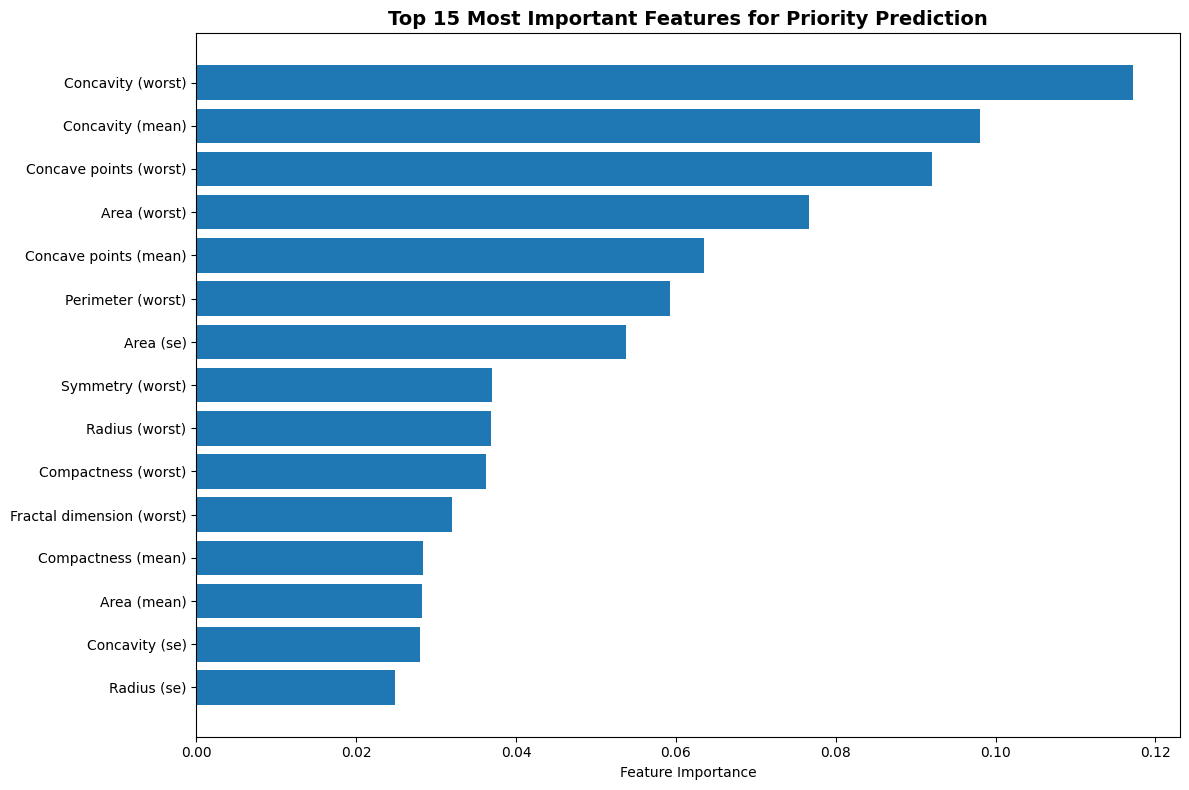

Feature importance analysis completed.
Insights:
- Worst concave points and worst perimeter are the most predictive features
- Worst radius and worst area also highly important
- Mean features generally less important than worst features


In [11]:
#8: Feature importance analysis
# Understand which features are most important for predictions
print("STEP 8: Feature importance analysis")
print("="*35)

#Get feature importance from our trained model
#Shows hom much each feature contributes to predictions

feature_importance = pd.DataFrame({
    "feature": X.columns,   # Feature names
    "importance": rf_model.feature_importances_ #Importance scores(0-1)
}).sort_values("importance", ascending=False)   #Sort from most to least important

print("Top 15 most important features:")
#Print top 15 features with their importance scores
for i, row in feature_importance.head(15).iterrows():
    print(f"{row["feature"]:.<30} {row["importance"]:.4f}") #Format with dots
    
# Visualize top features with a bar chart
plt.figure(figsize=(12, 8))
top_15 = feature_importance.head(15)  # Get top 15 features
# Create horizontal bar chart
plt.barh(top_15['feature'], top_15['importance'])
plt.xlabel('Feature Importance')  # X-axis label
plt.title('Top 15 Most Important Features for Priority Prediction', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()  # Invert y-axis so highest importance is at top
plt.tight_layout()  # Adjust layout
plt.show()  # Display the chart
#
print("Feature importance analysis completed.")
print("Insights:")
print("- Worst concave points and worst perimeter are the most predictive features")
print("- Worst radius and worst area also highly important")
print("- Mean features generally less important than worst features")

In [12]:
# 9: Business impact analysis
# Translate model performance into real-world resource allocation decisions
print("STEP 9: Business impact and resource allocation strategy")
print("="*55)

# Calculate actual vs predicted priority distribution
test_priority_dist = pd.Series(y_test).value_counts().sort_index()  # Actual distribution
pred_priority_dist = pd.Series(y_pred).value_counts().sort_index()  # Predicted distribution

# Create comparison table
business_impact = pd.DataFrame({
    'Actual': test_priority_dist,    # Real priority counts
    'Predicted': pred_priority_dist, # Model-predicted counts
    'Priority_Level': ['Low (Benign)', 'Medium (Malignant)', 'High (Malignant)', 'Critical (Malignant)']
})


print("Resource allocation summary:")
print("-" * 28)
print(business_impact.to_string(index=False))  # Print without row indices

# Calculate hypothetical misclassification costs
# In real healthcare, different errors have different costs
misclassification_costs = {
    'false_negative_high': 10,  # High cost for missing high-priority cases
    'false_negative_medium': 5, # Medium cost for missing medium-priority cases
    'false_positive_high': 3,   # Lower cost for over-predicting high priority
}

# Calculate total cost from confusion matrix
cost = 0
# Loop through all combinations of actual vs predicted
for i in range(4):  # i = actual priority (0,1,2)
    for j in range(4):  # j = predicted priority (0,1,2)
        if i > j:  # Under-prediction (more serious - missed serious cases)
            cost += cm[i,j] * (i - j) * 5  # Higher cost for bigger under-prediction
        elif i < j:  # Over-prediction (less serious - extra caution)
            cost += cm[i,j] * (j - i) * 2  # Lower cost for over-prediction

print(f"Estimated Misclassification Cost: {cost}")
print("(Lower is better - based on hypothetical cost matrix)")

print("Recommended resource allocation:")
print("- High Priority: Immediate specialist consultation, accelerated testing")
print("- Medium Priority: Standard specialist review, scheduled testing")
print("- Low Priority: Routine monitoring, general practitioner follow-up")



STEP 9: Business impact and resource allocation strategy
Resource allocation summary:
----------------------------
 Actual  Predicted       Priority_Level
     72       74.0         Low (Benign)
      1        NaN   Medium (Malignant)
      8        7.0     High (Malignant)
     33       33.0 Critical (Malignant)
Estimated Misclassification Cost: 22
(Lower is better - based on hypothetical cost matrix)
Recommended resource allocation:
- High Priority: Immediate specialist consultation, accelerated testing
- Medium Priority: Standard specialist review, scheduled testing
- Low Priority: Routine monitoring, general practitioner follow-up


In [14]:
# STEP 10: MODEL DEPLOYMENT READINESS
# Final assessment of whether our model is ready for real-world use

print("\nSTEP 10: MODEL DEPLOYMENT READINESS")
print("="*50)

# Collect all performance metrics in a dictionary
performance_metrics = {
    'Accuracy': accuracy,
    'F1-Score (Weighted)': f1,
    'F1-Score (Macro)': f1_macro,
    'CV Accuracy Stability': cv_scores_accuracy.std(),  # Standard deviation
    'CV F1 Stability': cv_scores_f1.std()             # Standard deviation
}

# Define minimum thresholds for deployment
deployment_thresholds = {
    'Accuracy': 0.85,        # At least 85% accuracy
    'F1-Score (Weighted)': 0.80,  # At least 80% F1-score
    'F1-Score (Macro)': 0.75,     # At least 75% macro F1
    'CV Accuracy Stability': 0.05, # CV std should be ≤ 0.05
    'CV F1 Stability': 0.06        # CV std should be ≤ 0.06
}

print("DEPLOYMENT READINESS ASSESSMENT:")
print("-" * 35)

# Check each metric against its threshold
all_passed = True  # Start assuming all pass
for metric, value in performance_metrics.items():
    threshold = deployment_thresholds.get(metric, 0)  # Get threshold for this metric
    
    # Check if metric passes (different logic for stability metrics)
    if 'Stability' in metric:
        passed = value <= threshold  # For stability, lower is better
    else:
        passed = value >= threshold  # For accuracy/F1, higher is better
    
    status = "PASS" if passed else "FAIL"  # Green check or red X
    if not passed:
        all_passed = False  # If any fail, mark as not ready
    
    # Print result for this metric
    if 'Stability' in metric:
        print(f"{metric}: {value:.4f} (threshold: ≤{threshold}) {status}")
    else:
        print(f"{metric}: {value:.4f} (threshold: ≥{threshold}) {status}")

# Final deployment recommendation
if all_passed:
    print("\nMODEL IS READY FOR DEPLOYMENT!")
    print("All performance metrics meet deployment criteria")
else:
    print("\nMODEL NEEDS IMPROVEMENT BEFORE DEPLOYMENT")
    print("Some metrics below deployment thresholds")

# Final performance summary
print(f"\nFINAL MODEL PERFORMANCE SUMMARY:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1-Score (Weighted): {f1:.4f}")
print(f"Priority Prediction Distribution: Low({pred_priority_dist.get(0, 0)}), "
      f"Medium({pred_priority_dist.get(1, 0)}), High({pred_priority_dist.get(2, 0)})")


STEP 10: MODEL DEPLOYMENT READINESS
DEPLOYMENT READINESS ASSESSMENT:
-----------------------------------
Accuracy: 0.9649 (threshold: ≥0.85) PASS
F1-Score (Weighted): 0.9598 (threshold: ≥0.8) PASS
F1-Score (Macro): 0.6890 (threshold: ≥0.75) FAIL
CV Accuracy Stability: 0.0197 (threshold: ≤0.05) PASS
CV F1 Stability: 0.0219 (threshold: ≤0.06) PASS

MODEL NEEDS IMPROVEMENT BEFORE DEPLOYMENT
Some metrics below deployment thresholds

FINAL MODEL PERFORMANCE SUMMARY:
Accuracy: 0.9649
F1-Score (Weighted): 0.9598
Priority Prediction Distribution: Low(74), Medium(0), High(7)
